In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math
import os
import funciones 

# Limpieza y análisis de datos

In [13]:
desc_1 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_1', 'planta_1_descripcion.csv')
desc_planta_1 = pd.read_csv(desc_1)

desc_planta_1

,name,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value
0,Conductividad,mS/cm,conductividad,1 minutes,NaN,NaN,NaN,NaN
1,Conductividad DAF,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.00
2,Fecha,Dia,horometro,1 minutes,NaN,NaN,NaN,NaN
3,Flujo Parshall 01 entrada a Ecualizador 1,m3/hr,caudal,1 minutes,30.0,NaN,NaN,0.00
4,Flujo de envío a DAF,m3/hr,caudal,1 minutes,30.0,NaN,NaN,NaN
5,Hora,min,horometro,1 minutes,NaN,NaN,NaN,NaN
6,Nivel Ecualizador 1 (Tk 30m3),%,nivel,1 minutes,NaN,80.0,10.0,5.00
7,Nivel Ecualizador 2 (Tk 250m3),%,nivel,1 minutes,95.0,90.0,10.0,5.00
8,PH Coagulación,-,ph,1 minutes,6.0,NaN,NaN,5.40
9,Temperatura DAF,°C,temperatura,1 minutes,35.0,30.0,5.0,5.00


In [14]:
planta_1 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_1', 'planta_1_datos.csv')
df_planta_1 = pd.read_csv(planta_1)

df_planta_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82380 entries, 0 to 82379
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   date_time                                  82380 non-null  object 
 1   Conductividad                              0 non-null      float64
 2   Conductividad DAF                          81992 non-null  float64
 3   Fecha                                      0 non-null      float64
 4   Flujo Parshall 01 entrada a Ecualizador 1  81994 non-null  float64
 5   Flujo de envío a DAF                       81996 non-null  float64
 6   Hora                                       0 non-null      float64
 7   Nivel Ecualizador 1 (Tk 30m3)              82001 non-null  float64
 8   Nivel Ecualizador 2 (Tk 250m3)             82005 non-null  float64
 9   PH Coagulación                             94 non-null     float64
 10  Temperatura DAF       

In [15]:
df_planta_1['date_time'] = pd.to_datetime(df_planta_1['date_time'])

df_planta_1.dropna(axis=1, how='all', inplace= True)
df_planta_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82380 entries, 0 to 82379
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   date_time                                  82380 non-null  datetime64[ns]
 1   Conductividad DAF                          81992 non-null  float64       
 2   Flujo Parshall 01 entrada a Ecualizador 1  81994 non-null  float64       
 3   Flujo de envío a DAF                       81996 non-null  float64       
 4   Nivel Ecualizador 1 (Tk 30m3)              82001 non-null  float64       
 5   Nivel Ecualizador 2 (Tk 250m3)             82005 non-null  float64       
 6   PH Coagulación                             94 non-null     float64       
 7   Temperatura DAF                            82007 non-null  float64       
 8   pH Clarificado DAF (Tk 80m3)               82007 non-null  float64       
 9   pH Ecualizador 2 

In [16]:
data_ph = df_planta_1.dropna(subset=['PH Coagulación'])

data_ph = data_ph[['date_time', 'PH Coagulación']]
data_ph.head()

,date_time,PH Coagulación
0,2024-08-13,5.7
1,2024-08-14,6.6
2,2024-08-20,6.3
3,2024-08-21,6.3
4,2024-08-27,5.8


In [17]:
df_planta_1.drop(columns=['PH Coagulación'], inplace=True)

In [18]:
df_planta_1.describe()

,date_time,Conductividad DAF,Flujo Parshall 01 entrada a Ecualizador 1,Flujo de envío a DAF,Nivel Ecualizador 1 (Tk 30m3),Nivel Ecualizador 2 (Tk 250m3),Temperatura DAF,pH Clarificado DAF (Tk 80m3),pH Ecualizador 2 (Tk 250m3),pH coagulación entrada DAF,pH entrada a Ecualizador 2 (Tk 250m3),pH salida a Parshall 02,Nivel Clarificado DAF (Tk 80m3),pH entrada a Ecualizador 1,Turbidez salida DAF,pH salida y control Ecualizador 1
count,82380,81992.000000,81994.000000,81996.000000,82001.000000,82005.000000,82007.000000,82007.000000,67566.000000,82011.000000,82009.000000,82009.000000,82012.000000,82013.000000,82010.000000,82007.000000
mean,2025-06-29 22:55:00.041514752,55.993934,5.651404,2.791925,72.429208,58.902851,0.002305,7.021673,0.001865,6.693540,4.876539,7.157002,36.785964,0.019012,639.207789,6.597263
min,2024-08-13 00:00:00,0.000000,0.000000,0.000000,42.000000,22.560764,0.000000,4.985171,0.000000,0.139757,0.933232,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-06-06 18:55:45,0.047743,3.675347,0.086806,66.822918,27.508680,0.000000,6.077148,0.000000,6.091074,4.784143,6.394387,12.783203,0.000000,1.591435,5.885764
50%,2025-07-05 23:42:30,0.093678,5.085070,0.130208,75.046295,70.810184,0.000000,7.122034,0.000000,6.936198,4.873770,6.906829,21.617840,0.000000,5.931713,6.792188
75%,2025-07-20 18:36:15,0.134549,6.847222,6.759983,80.000000,78.223381,0.000000,7.779297,0.000000,7.227358,4.962384,7.937789,59.820965,0.000000,492.006653,7.610764
max,2025-08-09 23:58:00,500.000000,107.415794,42.000000,80.000000,89.039352,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,90.000000,42.000000,4000.000000,42.000000
std,NaN,157.364673,3.430711,3.909135,8.389577,23.931608,0.302349,0.866152,0.279859,1.052294,0.279103,1.579460,27.870516,0.431945,1212.701532,2.198820


# Grafica

### Correlación

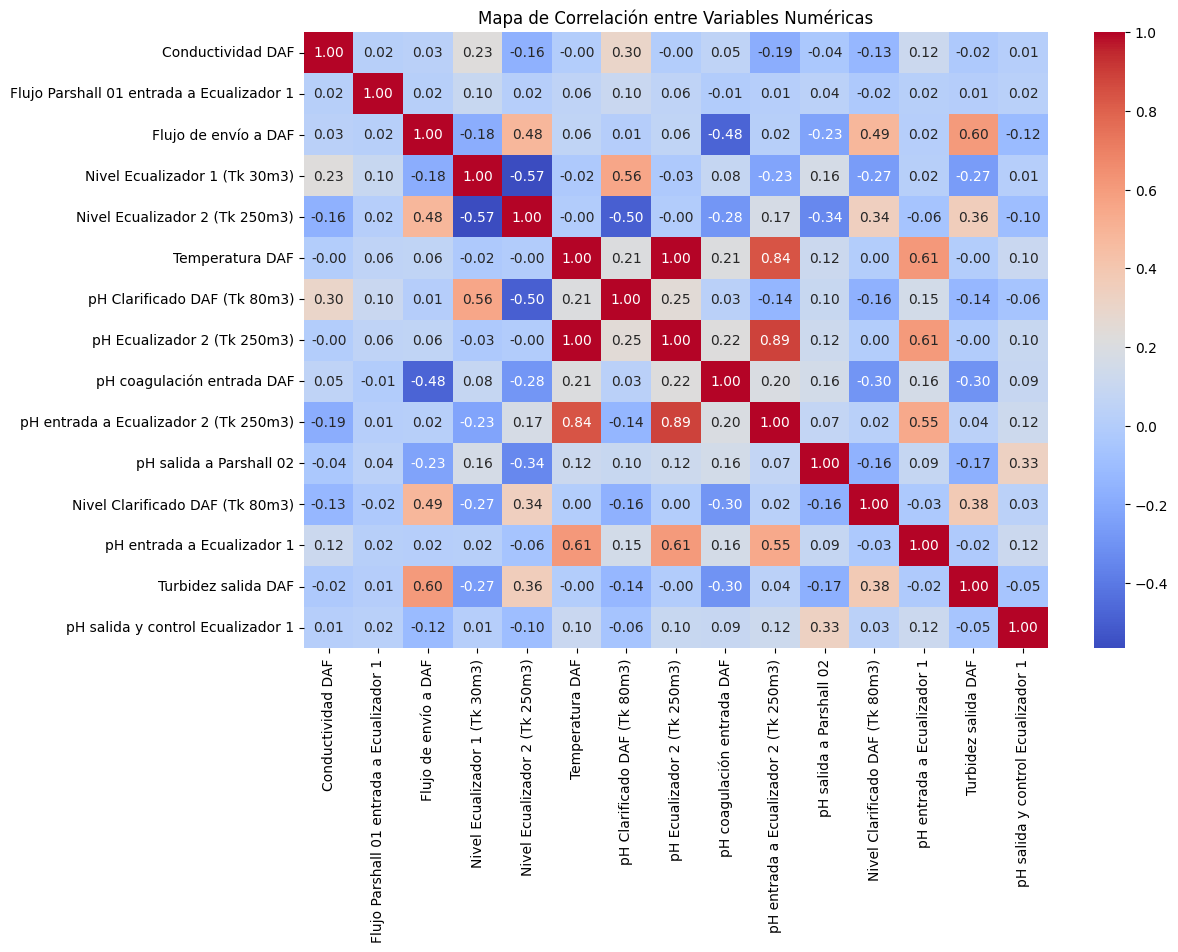

In [19]:
funciones.plot_corr(df_planta_1)

In [20]:
# Paso 1: transformar a formato largo
df_largo = df_planta_1.melt(
    id_vars=['date_time'],
    var_name='name',
    value_name='valor'
)

# Paso 2: unir con los límites
df_merged = df_largo.merge(desc_planta_1, on='name', how='left')

# Paso 3: función de chequeo
def evaluar_estado(row):
    v = row['valor']
    cmax = row['critical_max_value']
    wmax = row['warning_max_value']
    wmin = row['warning_min_value']
    cmin = row['critical_min_value']

    if pd.isna(v):
        return "sin_dato"
    if not pd.isna(cmax) and v > cmax:
        return "critico_max"
    if not pd.isna(cmin) and v < cmin:
        return "critico_min"
    if not pd.isna(wmax) and v > wmax:
        return "advertencia_max"
    if not pd.isna(wmin) and v < wmin:
        return "advertencia_min"
    return "ok"

# Paso 4: aplicar evaluación
df_merged['estado'] = df_merged.apply(evaluar_estado, axis=1)

# Paso 5: resumen por variable
resumen_alertas = df_merged.groupby(['name', 'estado']).size().unstack(fill_value=0)

# Si quieres solo las filas fuera de rango:
fuera_de_rango = df_merged[df_merged['estado'].str.startswith(('critico', 'advertencia'))].reset_index(drop=True)

In [21]:
fuera_de_rango

,date_time,name,valor,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value,estado
0,2025-05-21 06:29:00,Conductividad DAF,500.0,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.0,critico_max
1,2025-05-22 20:31:00,Conductividad DAF,42.0,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.0,critico_max
2,2025-05-22 20:41:00,Conductividad DAF,42.0,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.0,critico_max
3,2025-05-22 20:46:00,Conductividad DAF,500.0,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.0,critico_max
4,2025-05-22 20:47:00,Conductividad DAF,42.0,mS/cm,conductividad,1 minutes,0.7,0.5,0.0,0.0,critico_max
...,...,...,...,...,...,...,...,...,...,...,...
422549,2025-08-09 10:43:00,Turbidez salida DAF,4000.0,NTU,turbidez,1 minutes,2000.0,1000.0,0.0,0.0,critico_max
422550,2025-08-09 10:44:00,Turbidez salida DAF,4000.0,NTU,turbidez,1 minutes,2000.0,1000.0,0.0,0.0,critico_max
422551,2025-08-09 10:45:00,Turbidez salida DAF,4000.0,NTU,turbidez,1 minutes,2000.0,1000.0,0.0,0.0,critico_max
422552,2025-08-09 10:47:00,Turbidez salida DAF,4000.0,NTU,turbidez,1 minutes,2000.0,1000.0,0.0,0.0,critico_max
